# Clasificación de Imágenes de Perros y Gatos con VGG-16

En este Jupyter Notebook, vamos a desarrollar un clasificador de imágenes utilizando la arquitectura de red neuronal convolucional (CNN) conocida como VGG-16. Este modelo ha demostrado ser muy efectivo en tareas de clasificación de imágenes.

El objetivo es distinguir entre imágenes de perros y gatos. Para ello, utilizaremos un conjunto de datos que contiene 25,000 imágenes, con una distribución equitativa entre las dos clases. En este contexto, las etiquetas son 1 para los perros y 0 para los gatos.

VGG-16 es una arquitectura de CNN propuesta por K. Simonyan y A. Zisserman de la Universidad de Oxford en el paper "Very Deep Convolutional Networks for Large-Scale Image Recognition". Esta red es caracterizada por su simplicidad, utilizando solo capas convolucionales 3x3 apiladas una sobre otra en profundidad creciente.

Vamos a entrenar nuestro modelo en este conjunto de datos y evaluar su rendimiento. A lo largo de este notebook, exploraremos diferentes aspectos del proceso de entrenamiento y optimización del modelo, así como también la evaluación de su rendimiento.

In [ ]:
# Descargamos la base de datos de perros y gatos del sitio de Microsoft
# https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# y la descomprimimos en la carpeta data
# El archivo original se llama "PetImages.zip" y contiene dos carpetas
# llamadas "Cat" y "Dog" con imágenes de gatos y perros respectivamente.

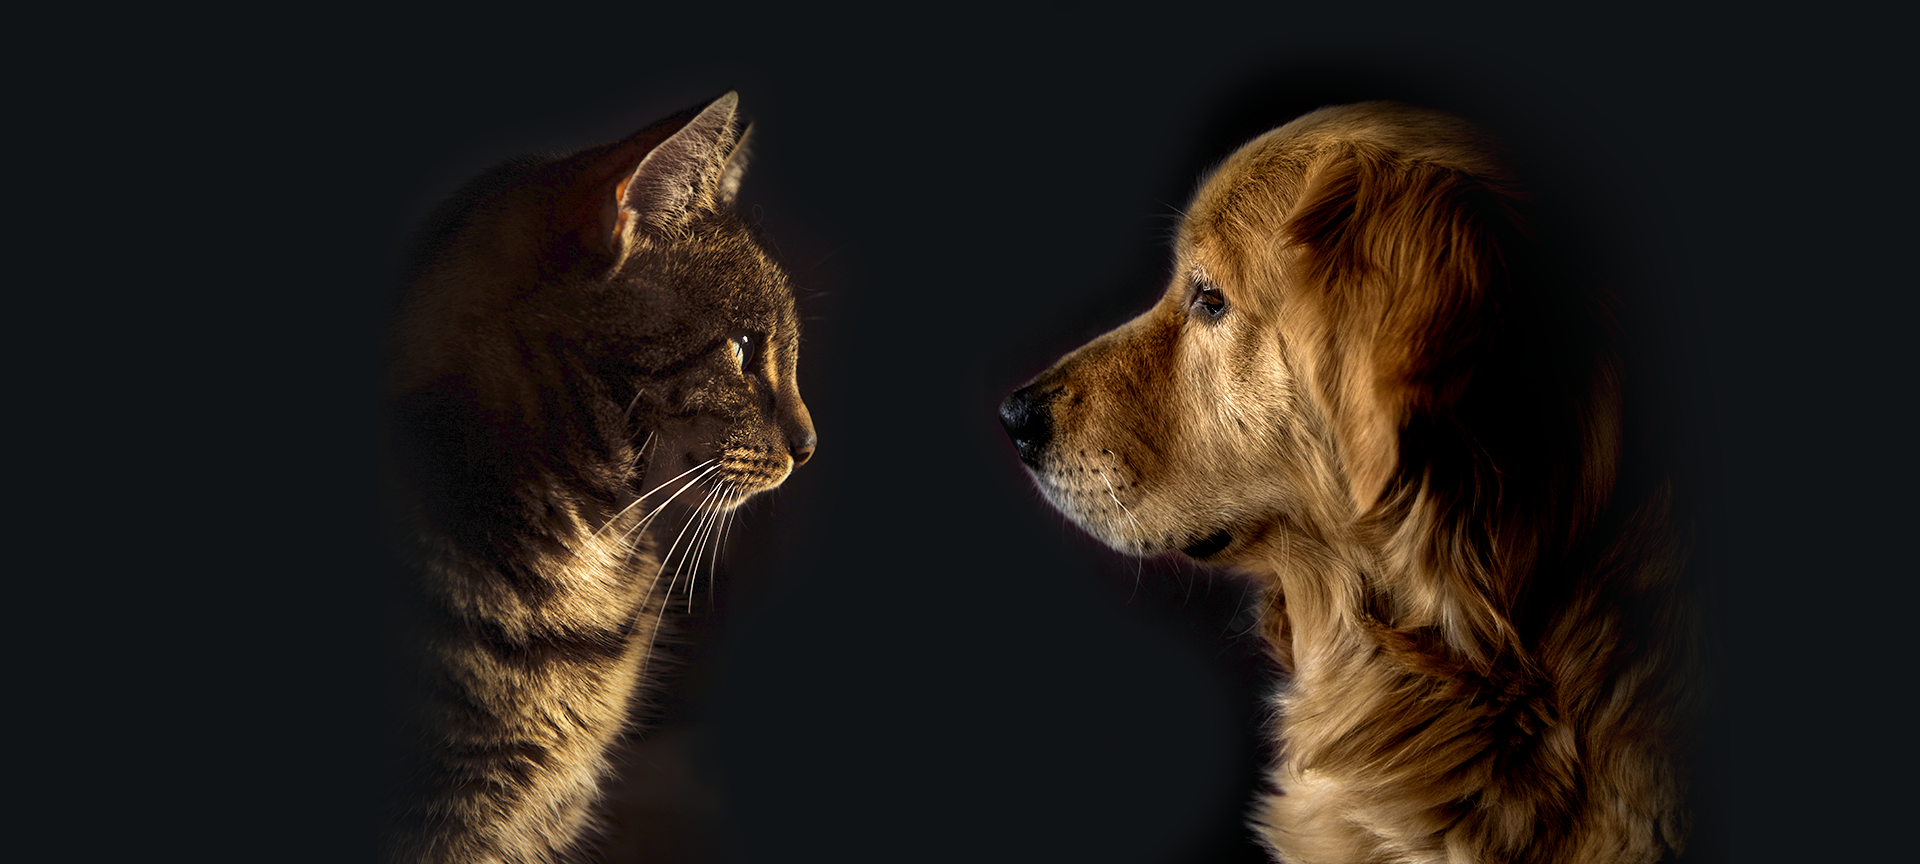

Primero, vamos a importar las bibliotecas necesarias:

In [1]:
!pip install ipykernel
!pip install opencv-python
!pip install keras
!pip install scikit-learn
!pip install tensorflow

  Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_10_16_x86_64.whl.metadata (20 kB)
  Using cached numpy-1.26.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_10_16_x86_64.whl (55.7 MB)
Using cached numpy-1.26.4-cp311-cp311-macosx_10_9_x86_64.whl (20.6 MB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached h5py-3.11.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata (2.5 kB)
  Using cached optree-0.11.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata (45 kB)
  Using cached ml_dtypes-0.4.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached keras-3.3.3-py3-none-any.whl (1.1 

In [2]:
import os
import cv2
import numpy as np
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2024-05-16 13:50:35.443155: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Cargamos las imágenes de perros y gatos:

In [3]:
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Cambiamos la dimensión para que coincida con la dimensión de entrada de VGG-16
            images.append(img)
            if 'Dog' in folder:
                labels.append(1)
            elif 'Cat' in folder:
                labels.append(0)
    return images, labels

dogs_images, dogs_labels = load_images('/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UHE/2024 Maestría IA Aplicada/Bases_Datos/Dog')
cats_images, cats_labels = load_images('/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UHE/2024 Maestría IA Aplicada/Bases_Datos/Cat')

# Combinamos los arrays de perros y gatos
images = np.array(dogs_images + cats_images)
labels = np.array(dogs_labels + cats_labels)

# One-hot encoding de las etiquetas
labels = to_categorical(labels)

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


Dividmos los datos en conjuntos de entrenamiento y prueba:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

Construimos y entrenamos la red neuronal convolucional VGG-16:

In [22]:
# Cargamos la red VGG16, asegurándonos de que se dejan fuera las capas superiores de la red preentrenada (head FC layer)
baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Construimos la capa que se colocará en la parte superior del modelo base (baseModel)
model = Sequential()
model.add(baseModel)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Dos clases (perro y gato), por lo que la capa de salida tiene 2 neuronas

# Congelamos las capas del modelo base para que no se actualicen durante el entrenamiento
for layer in baseModel.layers:
    layer.trainable = False

# Compilamos el modelo 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


In [ ]:
# Hacemos una predicción con una nueva imagen para comprobar que el modelo funciona
img = cv2.imread('genaro.jpg')
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(pred)